In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from numpy import mean,std

In [2]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

In [3]:
def get_voting(number_of_ensembles):
    models=list()
    for i in range(1,2*number_of_ensembles,2):
        models.append(('knn'+str(i),KNeighborsClassifier(n_neighbors=i)))
    
    ensemble = VotingClassifier(estimators=models,voting='hard')
    return ensemble

In [4]:
# get a list of models to evaluate
def get_models(number_of_ensembles):
    models = dict()
    for i in range(1,2*number_of_ensembles,2):
         models['knn'+str(i)] = KNeighborsClassifier(n_neighbors=i)
    models['hard_voting'] = get_voting(number_of_ensembles)
    return models

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
    

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)

>knn1 0.939 (0.000)
>knn3 0.965 (0.000)
>knn5 0.956 (0.000)
>knn7 0.930 (0.000)
>hard_voting 0.965 (0.000)


ValueError: Dimensions of labels and X must be compatible

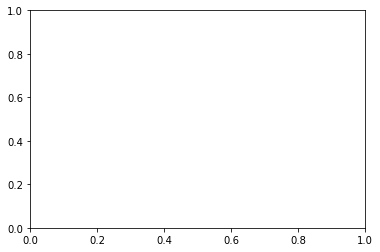

In [8]:
models = get_models(4)
results, names = list(),list()

for name,model in models.items():
    names.append(name)
    model.fit(X_train,y_train)
    scores = model.score(X_test, y_test)
    results.append(scores)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()
    